<a href="https://colab.research.google.com/github/pafernannapi18/GithubIntro/blob/main/22ndAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

In [1]:
import numpy as np
from numpy.random import * 
import random
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.svm import SVC 

In [5]:
class ScratchSVMClassifier():
  def __init__(self, num_iter, lr, Threshold):
      self.iter = num_iter
      self.lr = lr
      self.Threshold = Threshold
  def _SVC_hypothesis(self, X, y):
    y = y.reshape(-1, 1)

    for i in range(y.shape[0]):
      temp = 0
    for j in range(len(y)):
      temp += self.lambda_[j]*y[i]*y[j]* np.dot(X[i].T, X[j])
      self.lambda_[i] += self.lr*(1- temp)
      self.lambda_[self.lambda_ <= 0] = 0
      return self.lambda_
  def fit(self, X, y, X_val=None, y_val=None):
    np.random.seed(0)
    self.lambda_ = np.random.rand(X.shape[0], 1)*0.03

    for i in range(self.iter):
      self._SVC_hypothesis(X, y)

    self.index_1 = []
    for j, i in enumerate(self.lambda_):
      if i > self.Threshold:
        self.index_1 .append(j)
    self.lambda_sv = self.lambda_[self.index_1]
    self.X_sv = X[self.index_1]               
    self.y_sv = y[self.index_1]

  # Prediction phase
  def predict(self, X):
    self.y_pred = 0
    for i in range(self.lambda_sv.shape[0]):
      self.y_pred += self.lambda_sv[i] * self.y_sv[i]* np.dot(X, self.X_sv[i].T)
    self.y_pred = np.where(self.y_pred >0, 1, -1)
    return self.y_pred 

In [6]:
# Load our data 
iris = load_iris()
X = iris.data[50:,:]
y =  iris.target[50:]
X = X[:,[2,3]]
y[y==2] = -1

In [7]:
# Split our data into train test subset
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=0) 

In [8]:
# Standardize our data 
scaler = StandardScaler()
scaler.fit(X_train)
X_train1 = scaler.transform(X_train)  
X_test1 = scaler.transform(X_test)  

In [9]:
SV = ScratchSVMClassifier(num_iter=10000, lr = 0.01, Threshold=0.038)
SV.fit(X_train1, y_train) 
y_pred = SV.predict(X_test1) 

In [10]:
print("{}".format(precision_score(y_test, y_pred)))
print("{}".format(recall_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

1.0
0.9333333333333333
[[15  0]
 [ 1 14]]


Precision score The precision is the ratio tp/(tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not label as positive a sample that is negative.

Recall score is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

Confusion_matrix is a table that is often used to describe the performance model (or "classifier") on a set of test data for which the true values are known   


|    n=165    | Predicted: NO | Predicted: YES |     |
|:-----------:|:-------------:|:--------------:|:---:|
| Actual: NO  | TN = 50       | FP = 10        | 60  |
| Actual: YES | FN = 5        | TP = 100       | 105 |
|             | 55            | 110            |     |

## Decision area

In [11]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel= 'label', target_names= ['versicolor', 'verginica']):
  # Setting
  scatter_color = ['red', 'blue'] 
  contourf_color = ['pink', 'skyblue']
  n_class=2
  
  # Pred
  mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
  mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)
  #plot
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors ='y', linewidth =3, alpa =0.5)
  for i, target in enumerate(set(y)):
    plt.scatter(X[y==target][:, 0], X[y==target][:,1], s=80, color = scatter_color[i], label=target_names[i], marker='o')
  if model==SV:
    plt.scatter(SV.X_sv[:, 0], SV.X_sv[:,1], s=80, color = 'yellow', marker='o')
  else:
    plt.scatter(X_train[svc.support_, 0], X_train[svc.support_, 1], s=80, color = 'yellow', marker='o')  
  patches = [mpatches.Patch(color=scatter_color[i], label = target_names[i]) for i in range(n_class)]
  plt.legend(handles=patches)
  plt.legend()
  plt.show() 

In [12]:
# Random X, y to use
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0, 0.8], [0.8, 1.0]]

f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))

X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2)))*(-1))).astype(np.int)

random_index = np.random.permutation(np.arange(n_samples))
X = X[random_index]
y = y[random_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [13]:
svc = SVC(random_state=0, C = 1e10, kernel='linear')
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth', 'alpa'
  app.launch_new_instance()


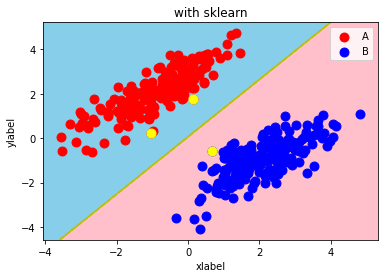

In [14]:
decision_region(X_train, y_train, svc, title='with sklearn', xlabel='xlabel', ylabel = 'ylabel', target_names=["A", "B"])

In [18]:
s_svc = ScratchSVMClassifier(num_iter=550, lr= 0.001, Threshold=1e-5)
s_svc.fit(X_train, y_train, X_test, y_test)
s_svc_pred = s_svc.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: The following kwargs were not used by contour: 'linewidth', 'alpa'
  app.launch_new_instance()


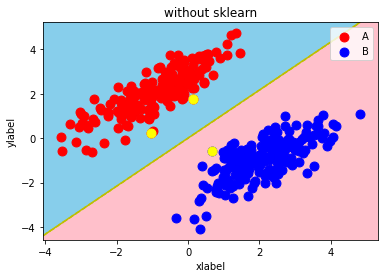

In [19]:
decision_region(X_train, y_train, s_svc, title='without sklearn', xlabel='xlabel', ylabel = 'ylabel', target_names=["A", "B"])